In [1]:
import numpy as np
#matplotlib inline

In [2]:
#产生测试数据
class GenTestData():
    def __init__(self,shape):
        self.shape=shape
    def func(self,dt):
        if(dt[0]+dt[1]<1):
            rt=[0.1]
        else:
            rt=[0.9]
        return rt
    def GenVali(self):
        self.vali=np.array(list(map(self.func,self.data)))
        return self.vali
    def GenData(self):
        self.data=np.random.random(self.shape)
        #for itr in range(len(self.data)):
            #self.data[itr,2]=1
        return self.data

In [3]:
class LMS():
    def active(self, x, function="sigmoid", derivative=False):
        if function=="sigmoid":
            if derivative==False:
                return 1/(1+np.exp(-x))
            else:
                return np.exp(-x)/(1+np.exp(-x))**2
        elif function=="line":
            if derivative==False:
                return x
            else:
                return np.ones_like(x)
    def __init__(self,shape=[2,1], init=1):
        self.shape=shape
        self.W=np.random.normal(loc=0.0, scale=0.1, size=shape)*init
        self.resv=self.W
        self.b=np.random.normal(loc=0.0, scale=0.1, size=shape[1])
    def train(self,data,vali,eta,is_grad=False):
        nu=np.dot(data,self.W)+np.tile(self.b,(np.shape(vali)[0], 1))
        para=(vali-self.active(nu, 
              function="sigmoid"))*self.active(nu, 
              function="sigmoid", 
              derivative=True)
        x=data
        self.grad_ave = np.dot(np.transpose(x),para)/len(data)
        if is_grad==True:
            return self.grad_ave[0,0], self.grad_ave[1,0]
        self.W=np.add(self.W,eta*self.grad_ave)
        self.b=np.add(self.b,eta*np.average(para))
    def valid(self,data):
        return self.active(np.dot(data,self.W))

In [4]:
genData=GenTestData([50,2])
lms=LMS([2,1])

In [5]:
for itr in range(500):
    test_data=genData.GenData()
    test_vali=genData.GenVali()
    lms.train(test_data,test_vali,2)

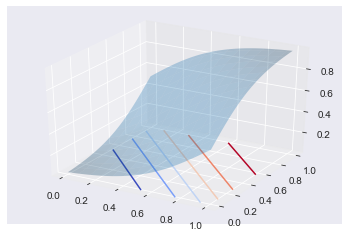

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
mpl.style.use('seaborn-darkgrid')

fig=plt.figure(1)
def sigmoid(rt):
    return 1/(1+np.exp(-rt))
def GenZ(X,Y):
    Z=np.zeros(np.shape(X))
    for ity in range(len(X)):
        for itx in range(len(X[0])):
            l1=np.matmul([X[ity,itx],Y[ity,itx]],lms.W[0:2])
            l1f=sigmoid(l1+lms.b)
            Z[ity,itx]=l1f[0]
    return Z
x=np.linspace(0,1,100)
y=np.linspace(0,1,100)
X,Y=np.meshgrid(x,y)
Z=GenZ(X,Y)
ax=fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z,rstride=8,cstride=8, alpha=0.3)
ax.contour(X,Y,Z,zdir='z',offset=0, cmap=plt.cm.coolwarm)
plt.show()

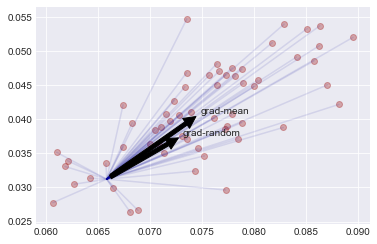

In [7]:
lms=LMS([2,1])
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
mpl.style.use('seaborn-darkgrid')
fig=plt.figure(2)
ax=fig.add_subplot(111)
u=[]
v=[]
uu=[]
vv=[]
for itr in range(60):
    test_data=genData.GenData()
    test_vali=genData.GenVali()
    a, b = lms.train(test_data,test_vali,2, is_grad=True)
    c=lms.W[0,0]
    d=lms.W[1,0]
    ax.plot([c, a+c],[d, b+d], color="#000099", alpha=0.1)
    ax.scatter([a+c],[b+d], marker='o', color="#990000", alpha=0.3)
    u.append(a+c)
    v.append(b+d)
    uu.append(a)
mu=np.mean(u)
mv=np.mean(v)
ax.annotate('', xy=(mu, mv), xytext=(c, d),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.text(mu, mv, "grad-mean")
for idx,itr in enumerate(uu):
    if(itr>0):
        ax.annotate('', xy=(u[idx], v[idx]), xytext=(c, d),
            arrowprops=dict(facecolor='black', shrink=0.05))
        plt.text(u[idx], v[idx], "grad-random")
        break
plt.show()

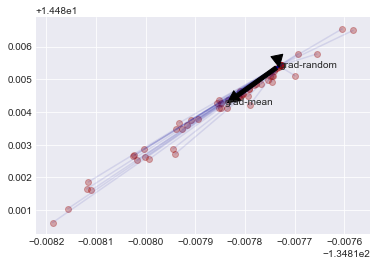

In [8]:
lms=LMS([2,1], init=1000)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
mpl.style.use('seaborn-darkgrid')
fig=plt.figure(2)
ax=fig.add_subplot(111)
u=[]
v=[]
uu=[]
vv=[]
for itr in range(60):
    test_data=genData.GenData()
    test_vali=genData.GenVali()
    a, b = lms.train(test_data,test_vali,2, is_grad=True)
    c=lms.W[0,0]
    d=lms.W[1,0]
    ax.plot([c, a+c],[d, b+d], color="#000099", alpha=0.1)
    ax.scatter([a+c],[b+d], marker='o', color="#990000", alpha=0.3)
    u.append(a+c)
    v.append(b+d)
    uu.append(a)
mu=np.mean(u)
mv=np.mean(v)
ax.annotate('', xy=(mu, mv), xytext=(c, d),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.text(mu, mv, "grad-mean")
for idx,itr in enumerate(uu):
    if(itr>0):
        ax.annotate('', xy=(u[idx], v[idx]), xytext=(c, d),
            arrowprops=dict(facecolor='black', shrink=0.05))
        plt.text(u[idx], v[idx], "grad-random")
        break
plt.show()